[44 points] Write a program to find the coefficients for a linear regression model for the dataset
provided (data2.txt). Assume a linear model: y = w0 + w1*x. You need to
1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column),
and use Python to implement the following methods to find the coefficients:
2) Normal equation, and
3) Gradient Descent using batch AND stochastic modes respectively:
  a) Split dataset into 80% for training and 20% for testing.
  b) Plot MSE vs. iteration of each mode for both training set and testing set (i.e., batch –
training and testing; stochastic – training and testing). Compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.)
  c) Plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01) and determine the best learning rate.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') 
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
doc = open("data2.txt", 'r').read()

Text(0.5, 1.0, 'Data sets')

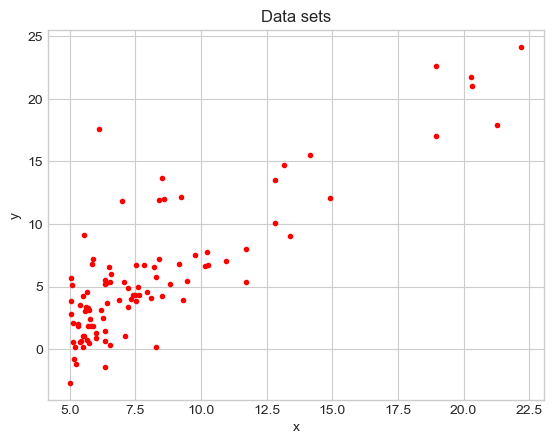

In [3]:
#1
data = list(doc.strip().split("\n"))
x_input = []
y_input = []
for row in data:
    x,y = row.split(",")
    x_input.append(float(x))
    y_input.append(float(y))
plt.plot(x_input,y_input, "r.")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data sets")

Text(0.5, 1.0, 'Coefficients with Normal equation')

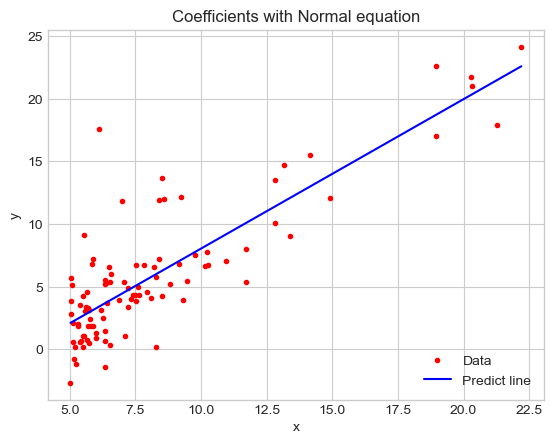

In [4]:
# 2
x_b = np.c_[np.ones((len(x_input), 1)), x_input]
co_effi = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y_input)
x_plot = np.array([[min(x_input)],[max(x_input)]])
x_plot_b = np.c_[np.ones((2, 1)), x_plot]
y_plot = x_plot_b.dot(co_effi)
plt.plot(x_input,y_input, "r.", label = "Data")
plt.plot(x_plot, y_plot, "b-",label="Predict line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "lower right")
plt.title("Coefficients with Normal equation")

a) Split dataset into 80% for training and 20% for testing

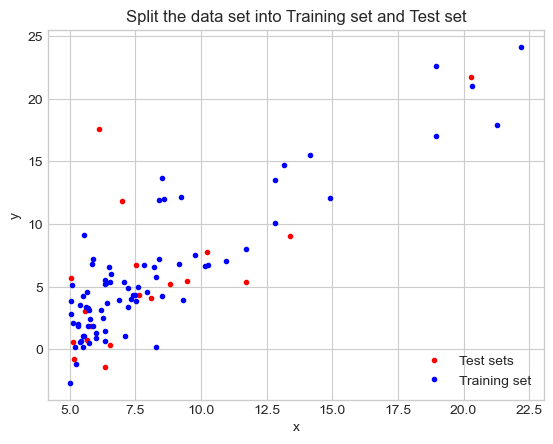

In [5]:
# 3
x = np.array(x_input)
y = np.array(y_input)
def split_train_test(x,y, test_ratio = 0.2):
    shuffle = np.random.permutation(len(x))
    test_set_size = int(len(x) * test_ratio)
    test_indices = shuffle[:test_set_size]
    train_indices = shuffle[test_set_size:]
    return x[train_indices], x[test_indices], y[train_indices],y[test_indices]
x_train, x_test, y_train, y_test = split_train_test(x,y)
plt.plot(x_test,y_test,"r.", label = "Test sets")
plt.plot(x_train,y_train,"b.", label = "Training set")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Split the data set into Training set and Test set")
plt.legend(loc = "lower right")


b) Plot MSE vs. iteration of each mode for both training set and testing set

In [6]:
x_b_train = np.c_[np.ones((len(x_train), 1)), x_train]
x_b_test = np.c_[np.ones((len(x_test), 1)), x_test]
num_iters = 2000
alpha = 0.0001
theta = np.random.randn(2,1)

In [7]:
def mse(x,y,theta):
    y_hat = x.dot(theta)
    mse = mean_squared_error(y, y_hat)
    return mse
    
def batch_gradient_descent(x, y, w, alpha):
    
    n = len(x)
    theta = np.copy(w)
    dj_dw =2/n * x.T.dot(np.reshape(x.dot(theta).T-y,(n,1)))
    theta = theta - alpha * dj_dw
 
    return theta    

Text(0.5, 1.0, 'Batch model for Training set and Test set')

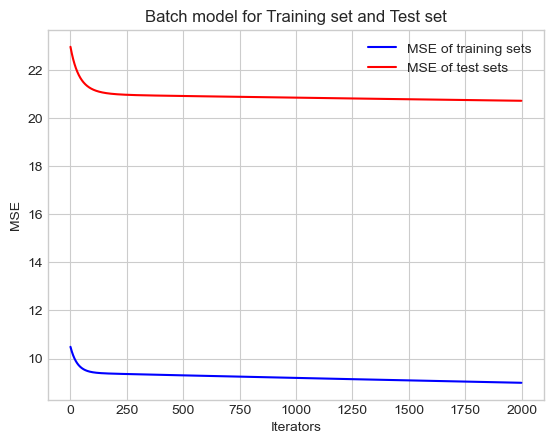

In [8]:
mse_train_batch = []
mse_test_batch = []
theta_batch = np.copy(theta)

for i in range(num_iters):
    theta_batch = batch_gradient_descent(x_b_train,y_train,theta_batch,alpha)
    mse_train_batch.append(mse(x_b_train, y_train, theta_batch))
    mse_test_batch.append(mse(x_b_test, y_test, theta_batch))
    
    
plt.plot(list(range(len(mse_train_batch))),mse_train_batch,"b-",label = "MSE of training sets")
plt.plot(list(range(len(mse_test_batch))),mse_test_batch,"r-",label = "MSE of test sets")
plt.legend(loc="upper right")
plt.xlabel("Iterators")
plt.ylabel("MSE")
plt.title("Batch model for Training set and Test set")

- Plot MSE vs. iteration of the batch model for both training set and testing set

In [9]:
def stochatistic_gradient_descent(x, y, w, eta):
    
    n = len(x)
    theta = np.copy(w)

    for j in range(n):
        random_example = np.random.randint(n)
        x_j = x[random_example:random_example+1]
        y_j = y[random_example:random_example+1]
        dj_dw =2 * x_j.T.dot(x_j.dot(theta)-y_j)
        theta = theta - eta * dj_dw

    return theta

Text(0.5, 1.0, 'Stochastic model for Training set and Test set')

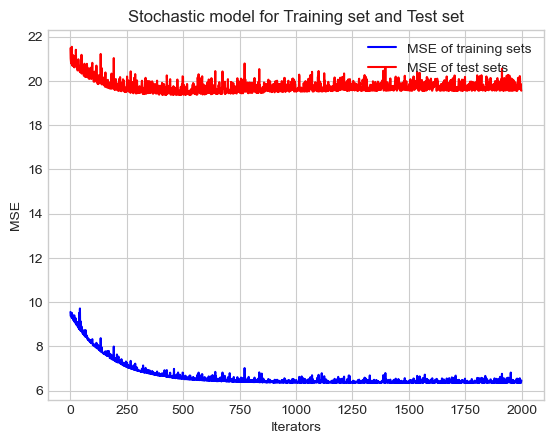

In [11]:
mse_train_sto = []
mse_test_sto = []
theta_sto = np.copy(theta)
for i in range(num_iters):
    theta_sto = stochatistic_gradient_descent(x_b_train,y_train,theta_sto,alpha)
    mse_train_sto.append(mse(x_b_train, y_train, theta_sto))
    mse_test_sto.append(mse(x_b_test, y_test, theta_sto))
    
plt.plot(list(range(num_iters)),mse_train_sto,"b-",label = "MSE of training sets")
plt.plot(list(range(num_iters)),mse_test_sto,"r-", label = "MSE of test sets")
plt.legend(loc = "upper right")
plt.xlabel("Iterators")
plt.ylabel("MSE")
plt.title("Stochastic model for Training set and Test set")

In [12]:
threshold = 0.001
speed_batch = []
speed_sto = []
list_mode = ["Batch mode", "Stochastic mode"]
for ite in range(num_iters):
    if ite<(num_iters-1) and ((mse_test_batch[ite] - mse_test_batch[ite+1]) < threshold):
        speed_batch.append(ite)
    elif ite<(num_iters-1) and abs(mse_test_sto[ite] - mse_test_sto[ite+1])< threshold:
        speed_sto.append(ite)
    elif speed_batch !=[] and speed_sto !=[]:
        break

print(f"After {num_iters} iterations with learning rate {alpha}: " + 
      f"We see that the mse of Batch mode in test sets is {mse_test_batch[-1]}," +
     f"while the Stochastic is {mse_test_sto[-1]}")
print(f"{list_mode[0] if mse_test_batch[-1]<mse_test_sto[-1] else list_mode[1]} is more accuracy.\n")
print(f"With the threshold {threshold},the speed of convergence of Batch mode at the iteration {speed_batch[0]} and " +
     f"The speed convergence of Stochastic mode at the iteration {speed_sto[0] if len(speed_sto)>0 else num_iters}")
print(f"{list_mode[0] if speed_batch[0]<(speed_sto[0] if len(speed_sto)>0 else num_iters) else list_mode[1]} converge faster than another.")

After 2000 iterations with learning rate 0.0001: We see that the mse of Batch mode in test sets is 20.70958360289078,while the Stochastic is 19.551768076148623
Stochastic mode is more accuracy.

With the threshold 0.001,the speed of convergence of Batch mode at the iteration 180 and The speed convergence of Stochastic mode at the iteration 2000
Batch mode converge faster than another.


Look at the above graphs, we can see the curve's convergence of the Batch mode is faster than the Stochastic mode.

c) Plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01) and determine the best learning rate.

The best learning rate is 0.002


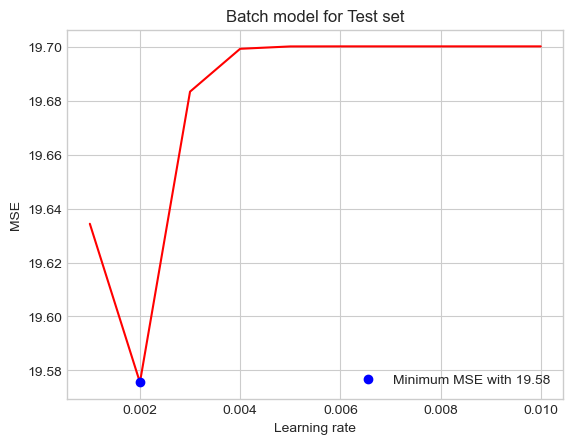

In [13]:
# c
learning_rate = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
mse_test_batch_c = []
theta_batch_c = np.copy(theta)
for rate in learning_rate:
    for i in range(num_iters):
        theta_batch_c = batch_gradient_descent(x_b_train,y_train,theta_batch_c,rate)
    mse_test_batch_c.append(mse(x_b_test, y_test, theta_batch_c))
min_batch = min(mse_test_batch_c)  
plt.plot(learning_rate,mse_test_batch_c,"r-")
plt.plot(learning_rate[mse_test_batch_c.index(min_batch)],min_batch, "bo",label='Minimum MSE with ' + str(round(min_batch,2)))
plt.legend(loc="best")
plt.xlabel("Learning rate")
plt.ylabel("MSE")
plt.title("Batch model for Test set")
print(f"The best learning rate is {learning_rate[np.argmin(mse_test_batch_c)]}")

The best learning rate is 0.009


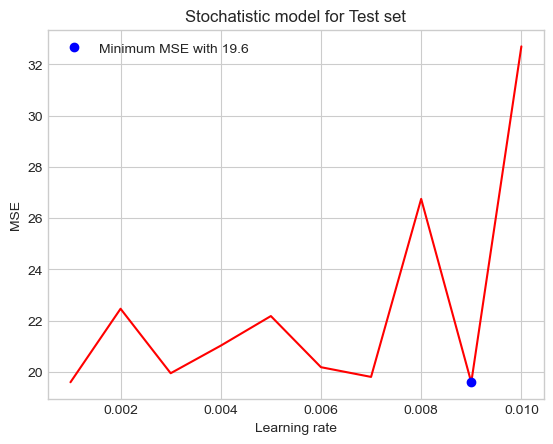

In [14]:
mse_test_sto_c = []
theta_sto_c = np.copy(theta)
for rate in learning_rate:
    for i in range(num_iters):
        theta_sto_c = stochatistic_gradient_descent(x_b_train,y_train,theta_sto,rate)
    mse_test_sto_c.append(mse(x_b_test, y_test, theta_sto_c))

min_sto = min(mse_test_sto_c)

plt.plot(learning_rate,mse_test_sto_c,"r-")
plt.plot(learning_rate[mse_test_sto_c.index(min_sto)],min_sto, "bo", label='Minimum MSE with ' + str(round(min_sto,2)))
plt.legend(loc = "best")
plt.xlabel("Learning rate")
plt.ylabel("MSE")
plt.title("Stochatistic model for Test set")
print(f"The best learning rate is {learning_rate[np.argmin(mse_test_sto_c)]}")